# Исследовательский анализ данных

Датасет - https://www.kaggle.com/datasets/jutrera/stanford-car-dataset-by-classes-folder/data

In [1]:
import pandas as pd # импортируем библиотеку Pandas
import numpy as np # импортируем библиотеку NumPy
import seaborn as sns # импортируем библиотеку Seaborn
import matplotlib.pyplot as plt # импортируем библиотеку Matplotlib
import time

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
data_train = pd.read_csv('car_data/anno_train.csv', header = None)
data_test = pd.read_csv('car_data/anno_test.csv', header = None)
data_train.columns = ['file_name', 'b_x1', 'b_y1', 'b_x2', 'b_y2', 'real_class']
data_test.columns = ['file_name', 'b_x1', 'b_y1', 'b_x2', 'b_y2', 'real_class']

In [3]:
display(data_train.head(3)) # знакомимся с данными
data_train.info() # выводим общую информацию о датафрейме

,file_name,b_x1,b_y1,b_x2,b_y2,real_class
0,00001.jpg,39,116,569,375,14
1,00002.jpg,36,116,868,587,3
2,00003.jpg,85,109,601,381,91


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_name   8144 non-null   object
 1   b_x1        8144 non-null   int64 
 2   b_y1        8144 non-null   int64 
 3   b_x2        8144 non-null   int64 
 4   b_y2        8144 non-null   int64 
 5   real_class  8144 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 381.9+ KB


In [4]:
display(data_test.head(3)) # знакомимся с данными
data_test.info() # выводим общую информацию о датафрейме

,file_name,b_x1,b_y1,b_x2,b_y2,real_class
0,00001.jpg,30,52,246,147,181
1,00002.jpg,100,19,576,203,103
2,00003.jpg,51,105,968,659,145


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8041 entries, 0 to 8040
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_name   8041 non-null   object
 1   b_x1        8041 non-null   int64 
 2   b_y1        8041 non-null   int64 
 3   b_x2        8041 non-null   int64 
 4   b_y2        8041 non-null   int64 
 5   real_class  8041 non-null   int64 
dtypes: int64(5), object(1)
memory usage: 377.0+ KB


In [5]:
size = data_train.shape
size2 = data_test.shape
print(f'Размер убучакющей выборки {size[0]} объектов, а тестовой {size2[0]} объектов')

Размер убучакющей выборки 8144 объектов, а тестовой 8041 объектов


<b> Комментарий студента:</b>

Большая часть данных сосредоточена в диапозоне от 20 до 41.
Фотографии людей старше 72 лет крайне редки, с обучением по этой категории модели будет сложнее.

<b> Комментарий студента:</b>

Построим график, посмотрим на распределение.

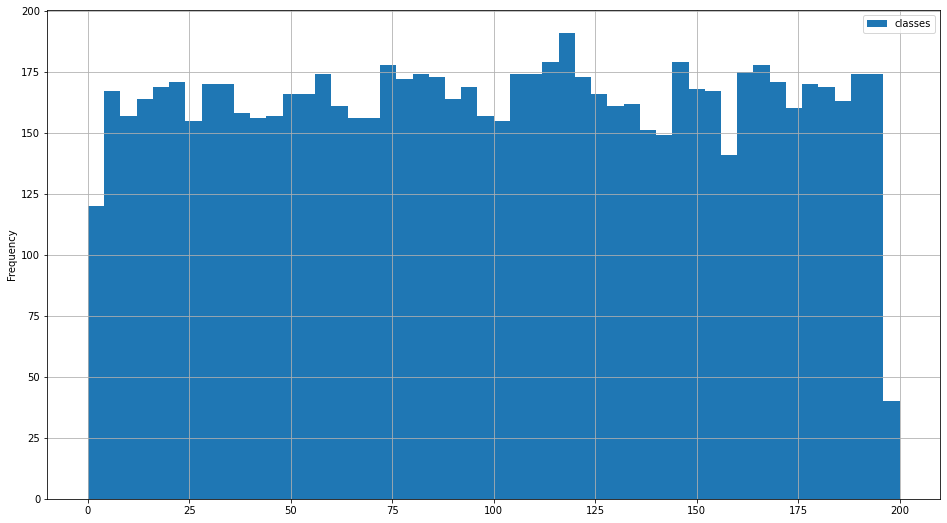

In [6]:
data_train['real_class'].plot(kind='hist',bins=50,label='classes',grid=True,legend=True,range=(0, 200),figsize=(16, 9))
plt.show() # выведем диаграмму

<b> Комментарий студента:</b>

Посмотрим на подробнее.

In [7]:
svod = data_train.pivot_table(index ='real_class', values = 'file_name', aggfunc = 'count').reset_index()
svod = svod.rename(columns={'file_name':'quantity','real_class':'class'}) # переименуем столбцы
display(svod.sort_values(by='quantity',ascending = False))
svod.describe()

,class,quantity
118,119,68
78,79,49
160,161,48
166,167,48
143,144,47
...,...,...
174,175,31
63,64,30
157,158,29
98,99,28


,class,quantity
count,196.00000,196.00000
mean,98.50000,41.55102
std,56.72448,4.33382
min,1.00000,24.00000
25%,49.75000,39.75000
50%,98.50000,42.00000
75%,147.25000,44.00000
max,196.00000,68.00000


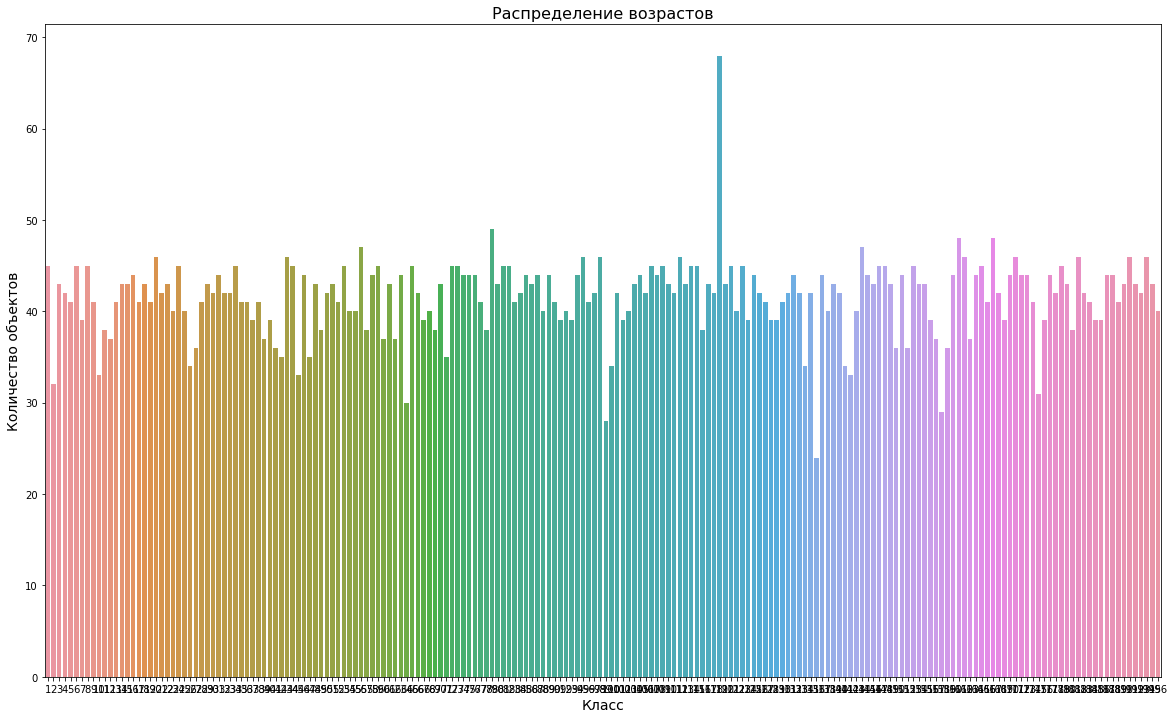

In [8]:
# построим график
plt.figure(figsize=(20,12)) 
plot_one = sns.barplot(data=svod, x="class", y="quantity")
plot_one.axes.set_title("Распределение возрастов", fontsize=16)
plot_one.set_xlabel("Класс", fontsize=14)
plot_one.set_ylabel("Количество объектов", fontsize=14)
plt.show()

<b> Комментарий студента:</b>

Максимальное количество объектов пренадлежит классу '119' и 68.

Минимальное у класса '135' в количестве 24.

Среднее количество объектов на класс 42.

In [9]:
datagen = ImageDataGenerator(rescale = 1/255) 
datagen_flow = datagen.flow_from_directory(
    r'C:\Users\maxim\II24\year_project\car_data\train',
    batch_size=16,
    seed=12345)
features, target = next(datagen_flow)

Found 8144 images belonging to 196 classes.


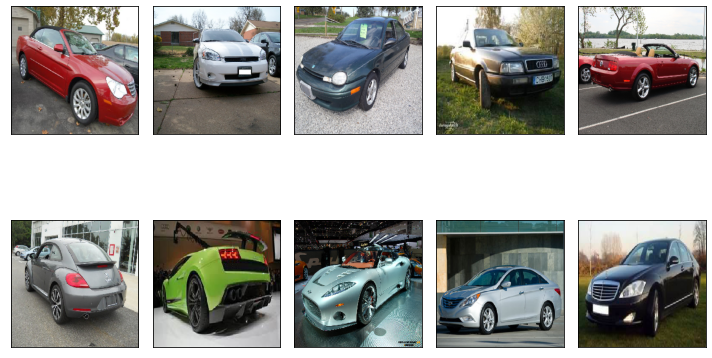

In [10]:
fig = plt.figure(figsize=(10,10))
for i in range(10):
    fig.add_subplot(2, 5, i+1)
    plt.imshow(features[i])
    plt.xticks([])
    plt.yticks([])
    plt.tight_layout()